In [1]:
import sympy
import numpy as np
from math import factorial
from sympy.interactive import printing

printing.init_printing(use_unicode=True) 

In [2]:
sympy.__version__

'1.1.1'

In [3]:
from time import time

In [66]:
wanted_order = 6

In [71]:
t1 = time()

# Defining symbols
H0_AA, H0_BB, H1_AA, H1_BB, H2_AB, H2_BA, S_AB, S_BA = sympy.symbols('H0_AA, H0_BB, H1_AA, H1_BB, H2_AB, H2_BA, S_AB, S_BA', commutative=False)
x = sympy.Symbol('x', commutative=True)
S_AB_i = sympy.symbols('S_AB^0:9', commutative=False)
S_BA_i = sympy.symbols('S_BA^0:9', commutative=False)

S_AB_series = 0
S_BA_series = 0
for i in range(1, wanted_order):
    S_AB_series += S_AB_i[i] * x ** (i)
    S_BA_series += S_BA_i[i] * x ** (i)

def commute_n_odd(H_AA, H_BB, S_AB, S_BA, n):
    assert n % 2 == 1
    res_AB = H_AA * S_AB - S_AB * H_BB
    res_BA = H_BB * S_BA - S_BA * H_AA
    for i in range((n - 1) // 2):
        res_AA = res_AB * S_BA - S_AB * res_BA
        res_BB = res_BA * S_AB - S_BA * res_AB
        res_AB = res_AA * S_AB - S_AB * res_BB
        res_BA = res_BB * S_BA - S_BA * res_AA
    return res_AB

def commute_n_even(H_AB, H_BA, S_AB, S_BA, n):
    assert n % 2 == 0
    res_AB = H_AB
    res_BA = H_BA
    for i in range(n // 2):
        res_AA = res_AB * S_BA - S_AB * res_BA
        res_BB = res_BA * S_AB - S_BA * res_AB
        res_AB = res_AA * S_AB - S_AB * res_BB
        res_BA = res_BB * S_BA - S_BA * res_AA
    return res_AB


# Calculating offdiagonal 
Hn_AB = 0
for j in range(wanted_order//2 + 1):
    Hn_AB += commute_n_odd(H0_AA + H1_AA, H0_BB + H1_BB, S_AB, S_BA, 2*j+1) / sympy.factorial(2*j+1)
    Hn_AB += commute_n_even(H2_AB, H2_BA, S_BA, S_AB, 2*j)  / sympy.factorial(2*j)

print('step 1')

# Removing not needed stuff
Hn_AB = Hn_AB.subs(S_AB, S_AB*x)
Hn_AB = Hn_AB.subs(S_BA, S_BA*x)
Hn_AB = Hn_AB.subs(H1_AA, H1_AA*x)
Hn_AB = Hn_AB.subs(H1_BB, H1_BB*x)
Hn_AB = Hn_AB.subs(H2_AB, H2_AB*x)
Hn_AB = Hn_AB.subs(H2_BA, H2_BA*x)

print('step 2')

collected = Hn_AB.expand().collect(x, evaluate=False)
Hn_AB = 0
for n in range(1, wanted_order+1):
    Hn_AB += collected[x**n]

print('step 3')    
    
# Getting important stuff
Hn_AB = Hn_AB.subs(H1_AA, H1_AA*x)
Hn_AB = Hn_AB.subs(H1_BB, H1_BB*x)
Hn_AB = Hn_AB.subs(H2_AB, H2_AB*x)
Hn_AB = Hn_AB.subs(H2_BA, H2_BA*x)
Hn_AB = Hn_AB.subs(S_AB, S_AB_series)
Hn_AB = Hn_AB.subs(S_BA, S_BA_series)
collected = Hn_AB.expand().collect(x, evaluate=False)

t2 = time()
print((t2-t1)/60)

step 1
step 2
step 3
0.9845522403717041


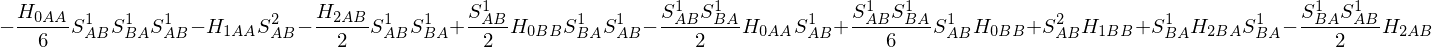

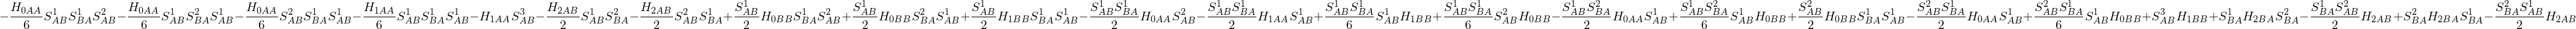

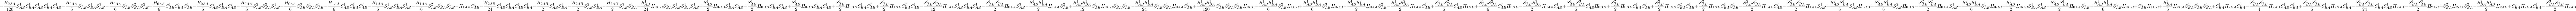

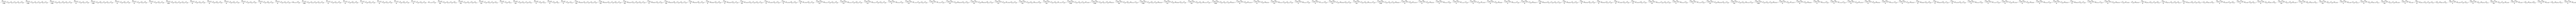

In [72]:
Y_i = []
for n in range(1, wanted_order + 1):
    Y = - (collected[x**n] - (H0_AA*S_AB_i[n] - S_AB_i[n]*H0_BB))
    Y = Y.expand()
    display(Y)
    Y_i.append(Y)

# for computations

In [21]:
## TODO: make this work as well

def write_n(n):
    expr = - (collected[x**n] - (H0*S_i[n] - S_i[n]*H0))
    expr.expand()
    
    output = ""
    output += 'def Y%i(H0, H1, H2' % n
    for i in range(1,n):
        output += ', S%i' % i
    output += '):\n'
    output += '    return (' + str(expr) + ')\n'
    return output

In [23]:
text_to_write = u""

for n in range(1, wanted_order+1):
    text_to_write += write_n(n)
    text_to_write += '\n\n'
    
import io

with io.open('perturbationS.py', 'w') as f:
    f.write(text_to_write)    